In [1]:
print("Hello world")

Hello world


In [ ]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Query the survived people names and their gender

In [4]:
survived=df.loc[df['Survived']==1,['Name','Sex']]
survived.head()

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [5]:
null_values=df[df['Embarked']=='Null']
null_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Question 1: What percentage of passengers survived?



In [ ]:
total_count=len(df)
survived_count=(df['Survived']==1).sum()
dead_count=total_count-survived_count
survived_percent= (survived_count/total_count)*100
dead_percent=(dead_count/total_count)*100
print(f"Total count:{total_count}")
print(f"survived: {survived_count} ({survived_percent:.1f}%)")
print(f"dead: {dead_count} ({dead_percent:.1f}%)")

Total count:891
survived: 342 (38.4%)
dead: 549 (61.6%)


 Question 2: How many men vs women survived?

In [ ]:
total_men=(df['Sex']=='male').sum()
total_women=(df['Sex']=='female').sum()
total_men_survived=((df['Sex']=='male') & (df['Survived']==1)).sum()
total_women_survived=((df['Sex']=='female') & (df['Survived']==1)).sum()
print(f"Men survived: {total_men_survived}/{total_men}")
print(f"Women survived: {total_women_survived}/{total_women}")


Men survived: 109/577
Women survived: 233/314


Question 3: What was the survival rate by passenger class (1st, 2nd, 3rd)?

In [ ]:
first_class_count=((df['Survived']==1) & (df['Pclass']==1)).sum()
first_srate=(first_class_count/(len(df[df['Pclass']==1])))*100
second_class_count=((df['Survived']==1) & (df['Pclass']==2)).sum()
second_srate=(second_class_count/len(df[df['Pclass']==2]))*100
third_class_count=((df['Survived']==1) & (df['Pclass']==3)).sum()
third_srate=(third_class_count/len(df[df['Pclass']==3]))*100
print(f"Survival_rate of 1st class: {first_srate:.1f}%")
print(f"Survival_rate of 2nd class: {second_srate:.1f}%")
print(f"Survival_rate of 3rd class: {third_srate:.1f}%")

Survival_rate of 1st class: 63.0%
Survival_rate of 2nd class: 47.3%
Survival_rate of 3rd class: 24.2%


Question 4: What's the average age of survivors vs non-survivors?

In [ ]:
age_live=df[df['Survived']==1]['Age'].mean()
age_dead=df[df['Survived']==0]['Age'].mean()
print(f"Average age of Survivors: {age_live:.2f}")
print(f"Average age of Non-Survivors: {age_dead:.2f}")


Average age of Survivors: 28.34
Average age of Non-Survivors: 30.63


In [25]:
import sqlite3
conn=sqlite3.connect('titanic.db')

In [26]:
df.to_sql('titanic_tb',conn,if_exists='replace',index=False)

891

In [ ]:
cur=conn.cursor()
for row in cur.execute('select * from titanic_tb limit 5'):
    print(row)
conn.close()

(1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171', 7.25, None, 'S')
(2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
(3, 1, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0, 'STON/O2. 3101282', 7.925, None, 'S')
(4, 1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', 53.1, 'C123', 'S')
(5, 0, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0, '373450', 8.05, None, 'S')


 Phase 2: SQL Analytical Queries

**Goal:** Answer key questions about the Titanic dataset using SQL

 Questions to Answer:

1. Overall Survival Rate
   - How many passengers survived vs died?
   - What percentage survived?

2. Survival by Passenger Class
   - Which class (1st, 2nd, 3rd) had the best survival rate?
   - Compare survival counts and percentages across classes

3. Survival by Gender
   - How did survival rates differ between male and female passengers?
   - Calculate survival percentage for each gender

4. Age Analysis
   - What was the average age of survivors vs non-survivors?
   - Any patterns in age distribution?

 Bonus Challenges (Optional):
- Survival rate by embarkation port (C, Q, S)
- Survival rate by age groups (child, adult, elderly)
- Combination analysis (e.g., survival by class AND gender)


In [ ]:
#question-1
result=pd.read_sql("select sum(Survived) as survivors, count(*)-sum(Survived) as dead,count(*) as total"
", (sum(Survived)*1.0/count(*))*100 as survival_rate from titanic_tb ",conn)
print(result)

   survivors  dead  total  survival_rate
0        342   549    891      38.383838


In [ ]:
#question-2
result=pd.read_sql("select Pclass,count(Pclass) as class_count,(sum(Survived)*1.0/count(Pclass))*100" \
" as class_Srate from titanic_tb group by Pclass",conn)
print(result)

   Pclass  class_count  class_Srate
0       1          216    62.962963
1       2          184    47.282609
2       3          491    24.236253


In [ ]:
#question-3
result=pd.read_sql("select Sex,count(Sex) as total_count, "
"(sum(Survived)*1.0/count(Sex))*100 as survival_percentage " \
"from titanic_tb group by Sex",conn)
print(result)

      Sex  total_count  survival_percentage
0  female          314            74.203822
1    male          577            18.890815


In [ ]:
#question-4
result=pd.read_sql("select Survived, avg(Age) as average_age " \
"from titanic_tb group by Survived",conn)
print(result)

   Survived  average_age
0         0    30.626179
1         1    28.343690


question-5 bonus

Survival rate by embarkation port (C, Q, S)


In [18]:
result=pd.read_sql("select Embarked, count(Embarked) as total_count, (sum(Survived)*1.0/count(Embarked))*100 as percentage_survived" \
" from titanic_tb  where Embarked in ('C','Q','S') group by Embarked",conn)
print(result)

  Embarked  total_count  percentage_survived
0        C          168            55.357143
1        Q           77            38.961039
2        S          644            33.695652


question-6

Survival rate by age groups (child, adult, elderly)


In [20]:
results=pd.read_sql("select " \
"case when age<13 then 'child' " \
"   when age>=13 and age<=64 then 'Adult' " \
"   when age>64 then 'Elderly' end age_group, "
"(sum(Survived)*1.0/count(Age))*100 as survival_percent from titanic_tb " \
"where Age is not null " \
"group by case when age<13 then 'child' " \
"when age>=13 and age<=64 then 'Adult' " \
"when age>64 then 'Elderly' end",conn)
print(results)

  age_group  survival_percent
0     Adult         39.274448
1   Elderly          9.090909
2     child         57.971014


question-6

Combination analysis (e.g., survival by class AND gender)

In [16]:
results=pd.read_sql("select Pclass,Sex,(sum(Survived)*1.0/count(*))*100 as survival_percent_by_class_gender" \
" from titanic_tb " \
"group by Pclass,Sex",conn)
print(results)

   Pclass     Sex  survival_percent_by_class_gender
0       1  female                         96.808511
1       1    male                         36.885246
2       2  female                         92.105263
3       2    male                         15.740741
4       3  female                         50.000000
5       3    male                         13.544669


Visualizations

 1. Survival by Class (Bar chart)
 2. Survival by Class + Gender (Grouped bar)
 3. Overall survival (Pie chart)
 4. Age distribution (Histogram)

In [13]:
import matplotlib.pyplot as ply
import seaborn as se

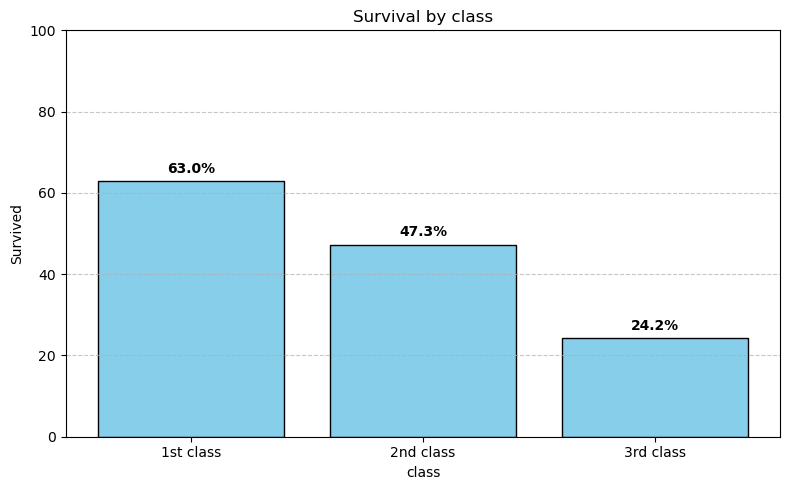

In [28]:
survival_percent=df.groupby('Pclass')['Survived'].mean()*100
ply.figure(figsize=(8,5))
ply.bar(survival_percent.index,survival_percent.values,color='skyblue',edgecolor='black')
for i,v in enumerate(survival_percent.values):
    ply.text(survival_percent.index[i],
             v+2,
             f'{v:.1f}%',
             ha='center',
             fontweight='bold')

ply.title('Survival by class')
ply.xlabel('class')
ply.ylabel('Survived')
ply.xticks([1,2,3],['1st class','2nd class','3rd class'])
ply.ylim(0,100)
ply.grid(axis='y',linestyle='--',alpha=0.7)
ply.tight_layout()
ply.show()

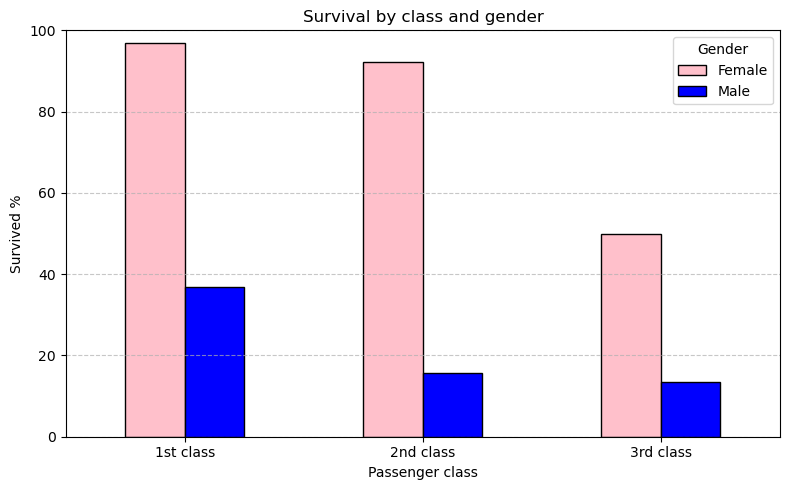

In [30]:
survival_gender_percent=df.groupby(['Pclass','Sex'])['Survived'].mean()*100
survival_pivot=survival_gender_percent.unstack()
fig,ax=ply.subplots(figsize=(8,5))
survival_pivot.plot(kind='bar',
                    ax=ax,
                    color=['pink','blue'],
                    edgecolor='black')
ply.title('Survival by class and gender')
ply.xlabel('Passenger class')
ply.ylabel('Survived %')
ply.xticks([0,1,2],['1st class','2nd class','3rd class'],rotation=0)
ply.legend(['Female','Male'],title='Gender')
ply.ylim(0,100)
ply.grid(axis='y',linestyle='--',alpha=0.7)
ply.tight_layout()
ply.show()

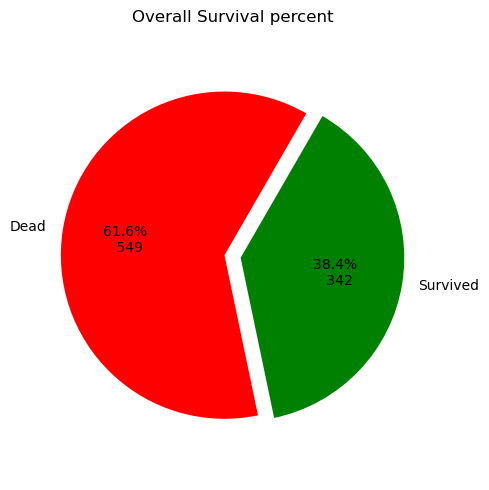

In [24]:
overall_survival=df['Survived'].value_counts()
def make_autopct(values):
    def my_autopct(pct):
        total=sum(values)
        res=f'{pct:.1f}% \n {int(round(pct*total/100)):d}'
        return res
    return my_autopct
ply.figure(figsize=(5,5))
ply.pie(overall_survival.values,labels=['Dead','Survived'],autopct=make_autopct(overall_survival.values),
        explode=(0,0.1),startangle=60,colors=['red','green'])
ply.title('Overall Survival percent')
ply.axis('equal')
ply.tight_layout()
ply.show()

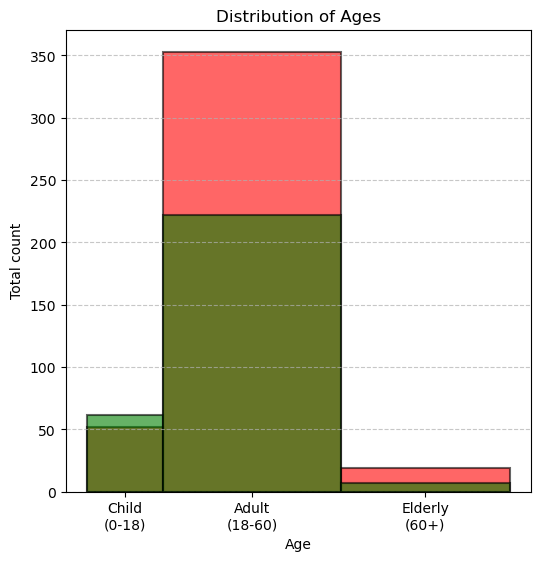

In [37]:
survivors=df[df['Survived']==1]['Age'].dropna()
non_survivors=df[df['Survived']==0]['Age'].dropna()
ply.figure(figsize=(6,6))
custom_bins=[0,18,60,100]
ply.hist(non_survivors,custom_bins,edgecolor='black',alpha=0.6,
         color='red',linewidth=1.5,label='Died')
ply.hist(survivors,custom_bins,edgecolor='black',alpha=0.6,
         color='green',linewidth=1.5,label='Survived')
ply.xlabel('Age')
ply.ylabel('Total count')
ply.title('Distribution of Ages')
ply.xticks([9,39,80],['Child\n(0-18)','Adult\n(18-60)','Elderly\n(60+)'])
ply.grid(axis='y',linestyle='--',alpha=0.7)
ply.show()

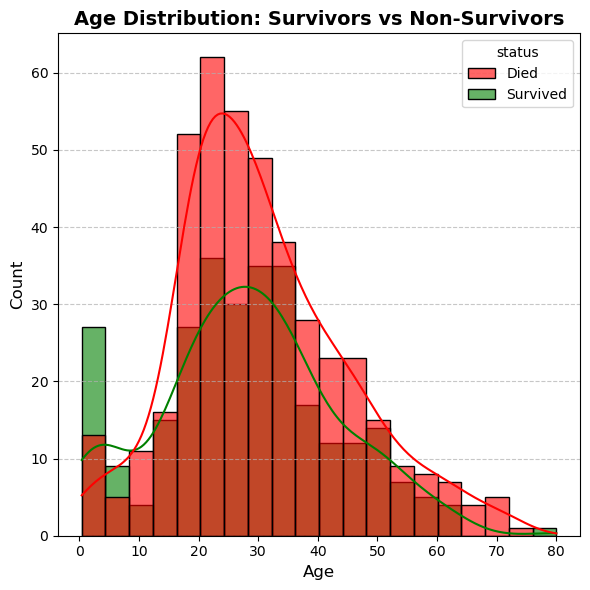

In [40]:
df_clean=df[['Age','Survived']].dropna()
df_clean['status']=df_clean['Survived'].map({0:'Died',1:'Survived'})

ply.figure(figsize=(6,6))

se.histplot(data=df_clean,x='Age',hue='status',bins=20,
            palette=['red','green'],alpha=0.6,edgecolor='black',kde=True)
ply.title('Age Distribution: Survivors vs Non-Survivors', 
          fontsize=14, fontweight='bold')
ply.xlabel('Age', fontsize=12)
ply.ylabel('Count', fontsize=12)
ply.grid(axis='y', linestyle='--', alpha=0.7)
ply.tight_layout()
ply.show()